### Exploring Cape Python with Pandas: IoT Dataset

This Jupyter Notebook was presented as part of [Coiled's Science Thursdays](https://coiled.io/blog/data-privacy-distributed-compute.html). To follow along, you will need to [download the example dataset](https://capeprivacy.com/example-dataset/) and put it in a relative folder called `data` (or update the file path below). You will also need to [download the policy file]() and put it in a relative folder called `policy` or ensure you have Cape Python installed locally and change the path to use the copy in the `examples` folder.

For more information on Cape Python, please check out our [documentation](https://docs.capeprivacy.com/libraries/cape-python/).

In [1]:
import pandas as pd
import cape_dataframes as cape_df
import cape_dataframes.pandas.transformations as pandas_transformations

%matplotlib inline

In [2]:
df = pd.read_csv('../data/iot_example.csv')

In [3]:
df.head()

,timestamp,username,temperature,heartrate,build,latest,note
0,2017-01-01T12:00:23,michaelsmith,12,67,4e6a7805-8faa-2768-6ef6-eb3198b483ac,0,interval
1,2017-01-01T12:01:09,kharrison,6,78,7256b7b0-e502-f576-62ec-ed73533c9c84,0,wake
2,2017-01-01T12:01:34,smithadam,5,89,9226c94b-bb4b-a6c8-8e02-cb42b53e9c90,0,NaN
3,2017-01-01T12:02:09,eddierodriguez,28,76,2599ac79-e5e0-5117-b8e1-57e5ced036f7,0,update
4,2017-01-01T12:02:36,kenneth94,29,62,122f1c6a-403c-2221-6ed1-b5caa08f11e0,0,user


<AxesSubplot:>

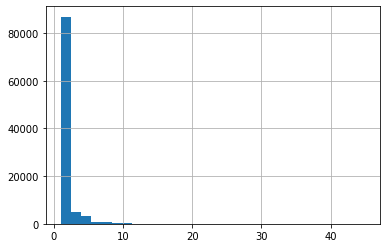

In [4]:
df.username.value_counts().hist(bins=30)

### Based off an initial look, the columns I am most concerned about are timestamp and username. We want to obfuscate those but leave some information / utility so we can still do our job as data scientists!

In [ ]:
pandas_transformations.

In [5]:
pandas_transformations.DateTruncation?

In [6]:
df.dtypes

timestamp      object
username       object
temperature     int64
heartrate       int64
build          object
latest          int64
note           object
dtype: object

### I need to make sure this is the proper dtype! :) 

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
df['timestamp']

0        2017-01-01 12:00:23
1        2017-01-01 12:01:09
2        2017-01-01 12:01:34
3        2017-01-01 12:02:09
4        2017-01-01 12:02:36
                 ...        
146392   2017-02-28 23:58:06
146393   2017-02-28 23:58:43
146394   2017-02-28 23:59:23
146395   2017-02-28 23:59:48
146396   2017-03-01 00:00:30
Name: timestamp, Length: 146397, dtype: datetime64[ns]

In [9]:
truncate_date = pandas_transformations.DateTruncation(frequency="day")

In [10]:
truncate_date(df['timestamp'])

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
146392   2017-02-28
146393   2017-02-28
146394   2017-02-28
146395   2017-02-28
146396   2017-03-01
Length: 146397, dtype: datetime64[ns]

In [11]:
df['timestamp'] = truncate_date(df['timestamp'])

In [12]:
df.head()

,timestamp,username,temperature,heartrate,build,latest,note
0,2017-01-01,michaelsmith,12,67,4e6a7805-8faa-2768-6ef6-eb3198b483ac,0,interval
1,2017-01-01,kharrison,6,78,7256b7b0-e502-f576-62ec-ed73533c9c84,0,wake
2,2017-01-01,smithadam,5,89,9226c94b-bb4b-a6c8-8e02-cb42b53e9c90,0,NaN
3,2017-01-01,eddierodriguez,28,76,2599ac79-e5e0-5117-b8e1-57e5ced036f7,0,update
4,2017-01-01,kenneth94,29,62,122f1c6a-403c-2221-6ed1-b5caa08f11e0,0,user


### I'm concerned that the Username column should also be protected

In [13]:
pandas_transformations.Tokenizer?

In [14]:
tokenize_username = pandas_transformations.Tokenizer(key='super_secret_please_dont_use_this', max_token_len=20)

In [15]:
tokenize_username(df['username']).value_counts()

41aacaf4768667867bd9    45
61922d813d063dc3843b    43
1de5f9b67a14f14fdc54    41
fd3cf6c6f1fd54282d27    40
a7c6590a26239398765b    37
                        ..
075fdd85d30fb8938ce7     1
3cd4b15a2c436a69dc45     1
51a587af2bc372a8d891     1
df408e3193db250fa343     1
78adda11e977f49e6575     1
Name: username, Length: 96795, dtype: int64

In [16]:
df['username'] = tokenize_username(df['username'])

### Now it's time to save this dataset and share for larger data science tasks

In [17]:
df.to_csv('../data/caped_iot_example.csv')